In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as cs

In [3]:
data  = pd.read_csv('dataset.csv')
data.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [6]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10000 non-null  int64         
 1   title              10000 non-null  object        
 2   genre              9997 non-null   object        
 3   original_language  10000 non-null  object        
 4   overview           9987 non-null   object        
 5   popularity         10000 non-null  float64       
 6   release_date       10000 non-null  datetime64[ns]
 7   vote_average       10000 non-null  float64       
 8   vote_count         10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 703.2+ KB


In [8]:
data.isna().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [9]:
data.dropna(axis=0 , inplace=True)

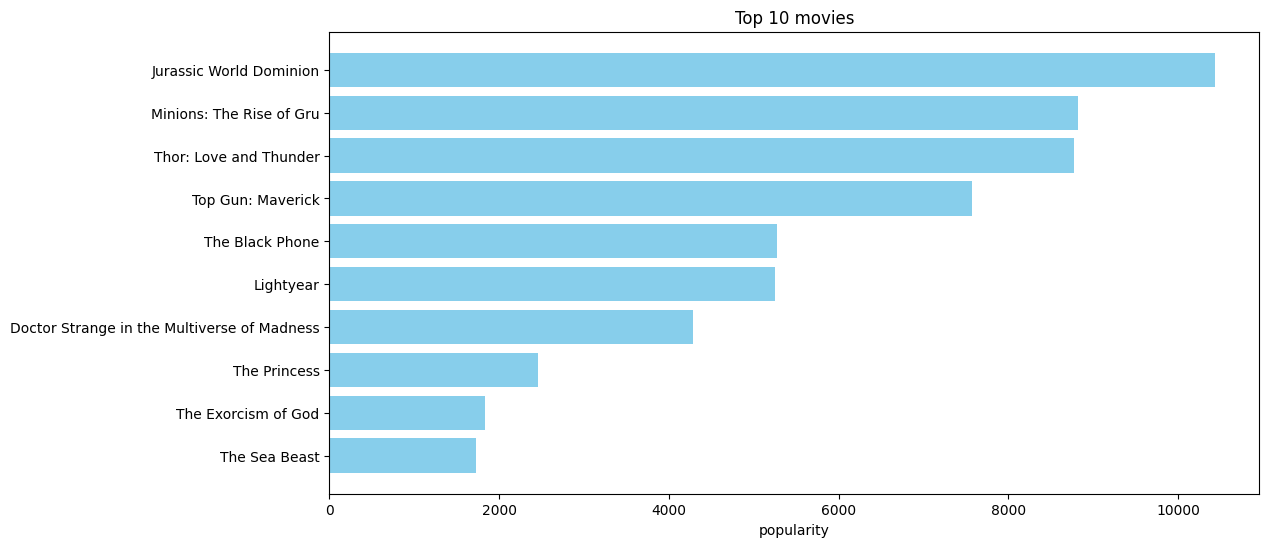

In [10]:
def plot():
    popularity = data.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("popularity")
    plt.show()

plot()

In [13]:
selected_features = ['title']
df = data[selected_features]

In [14]:
df['info'] = data['overview'] + data['genre']

<ipython-input-14-5c41005bfd18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['info'] = data['overview'] + data['genre']


In [15]:
df.head()

,title,info
0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,Schindler's List,The true story of how businessman Oskar Schind...
4,The Godfather: Part II,In the continuing saga of the Corleone crime f...


In [16]:
cv=CountVectorizer(max_features=df.shape[0], stop_words='english')

In [17]:
vector=cv.fit_transform(df['info'].values.astype('U')).toarray()

In [18]:
similarity=cs(vector)
similarity.shape

(9985, 9985)

In [24]:
def recommender(movie , number):
    index=df[df['title']==movie].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[1:number]:
        print(df.iloc[i[0]].title)

In [33]:
user_movie = str(input('What is your favorite movie? '))

What is your favorite movie? Iron Man


In [34]:
recommender(user_movie ,3 )

Iron Man 3
Guardians of the Galaxy Vol. 2


In [35]:
import pickle

In [36]:
pickle.dump(df, open('movies.pkl', 'wb'))

In [37]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))